In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Load the dataset
data = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0        

In [7]:
# Check the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(520, 17)


In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [9]:
# Data preprocessing
# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Polyuria'] = data['Polyuria'].map({'Yes': 1, 'No': 0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes': 1, 'No': 0})
data['sudden weight loss'] = data['sudden weight loss'].map({'Yes': 1, 'No': 0})
data['weakness'] = data['weakness'].map({'Yes': 1, 'No': 0})
data['Polyphagia'] = data['Polyphagia'].map({'Yes': 1, 'No': 0})
data['Genital thrush'] = data['Genital thrush'].map({'Yes': 1, 'No': 0})
data['visual blurring'] = data['visual blurring'].map({'Yes': 1, 'No': 0})
data['Itching'] = data['Itching'].map({'Yes': 1, 'No': 0})
data['Irritability'] = data['Irritability'].map({'Yes': 1, 'No': 0})
data['delayed healing'] = data['delayed healing'].map({'Yes': 1, 'No': 0})
data['partial paresis'] = data['partial paresis'].map({'Yes': 1, 'No': 0})
data['muscle stiffness'] = data['muscle stiffness'].map({'Yes': 1, 'No': 0})
data['Alopecia'] = data['Alopecia'].map({'Yes': 1, 'No': 0})
data['Obesity'] = data['Obesity'].map({'Yes': 1, 'No': 0})
data['class'] = data['class'].map({'Positive': 1, 'Negative': 0})

In [10]:
# Check for NaN values after encoding
print("\nMissing values after encoding:")
print(data.isnull().sum())


Missing values after encoding:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [11]:
# Handle NaN values: Fill with the mean of each column
data.fillna(data.mean(), inplace=True)

In [12]:
# Verify that there are no NaN values left
print("\nMissing values after filling NaNs:")
print(data.isnull().sum())


Missing values after filling NaNs:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


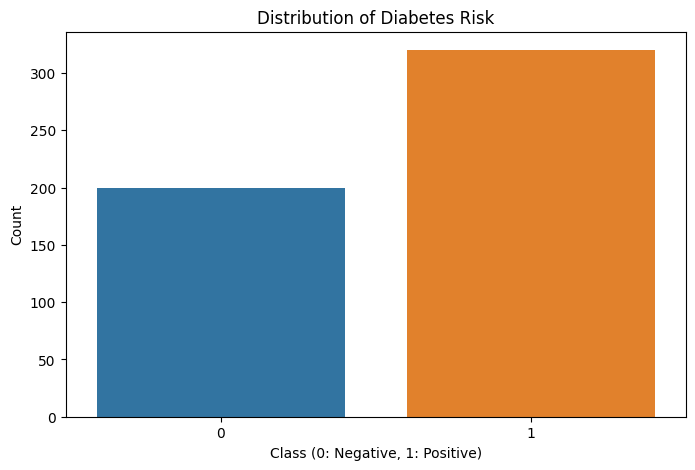

In [13]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=data)
plt.title('Distribution of Diabetes Risk')
plt.xlabel('Class (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

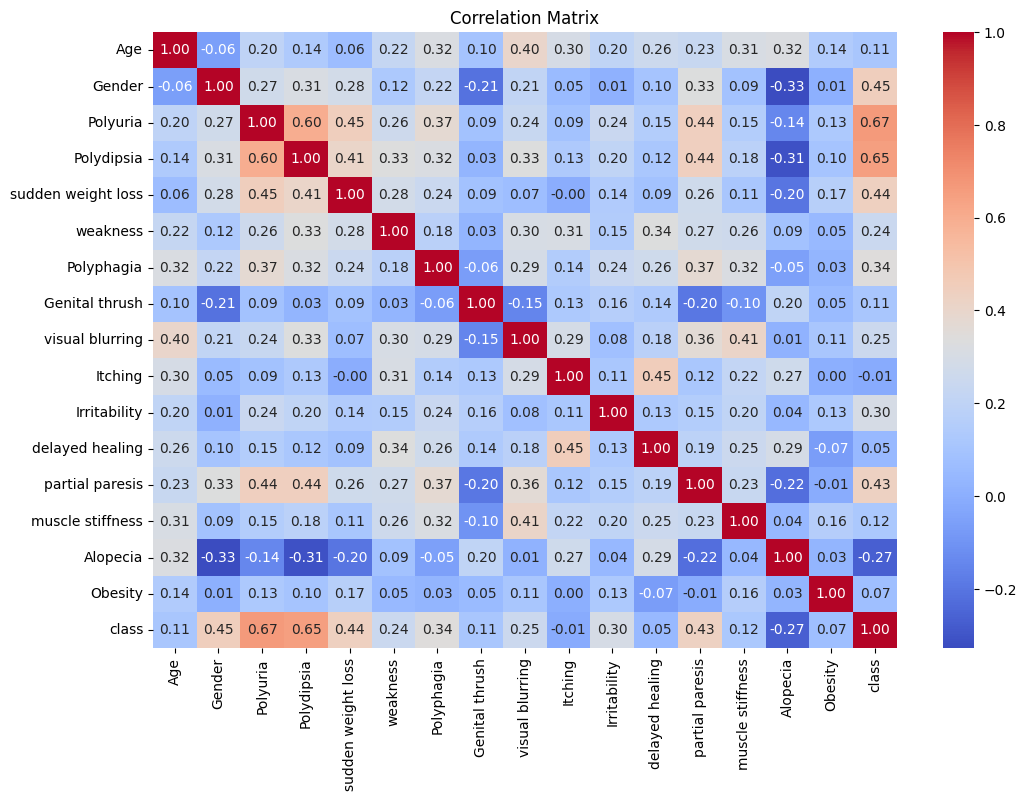

In [14]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

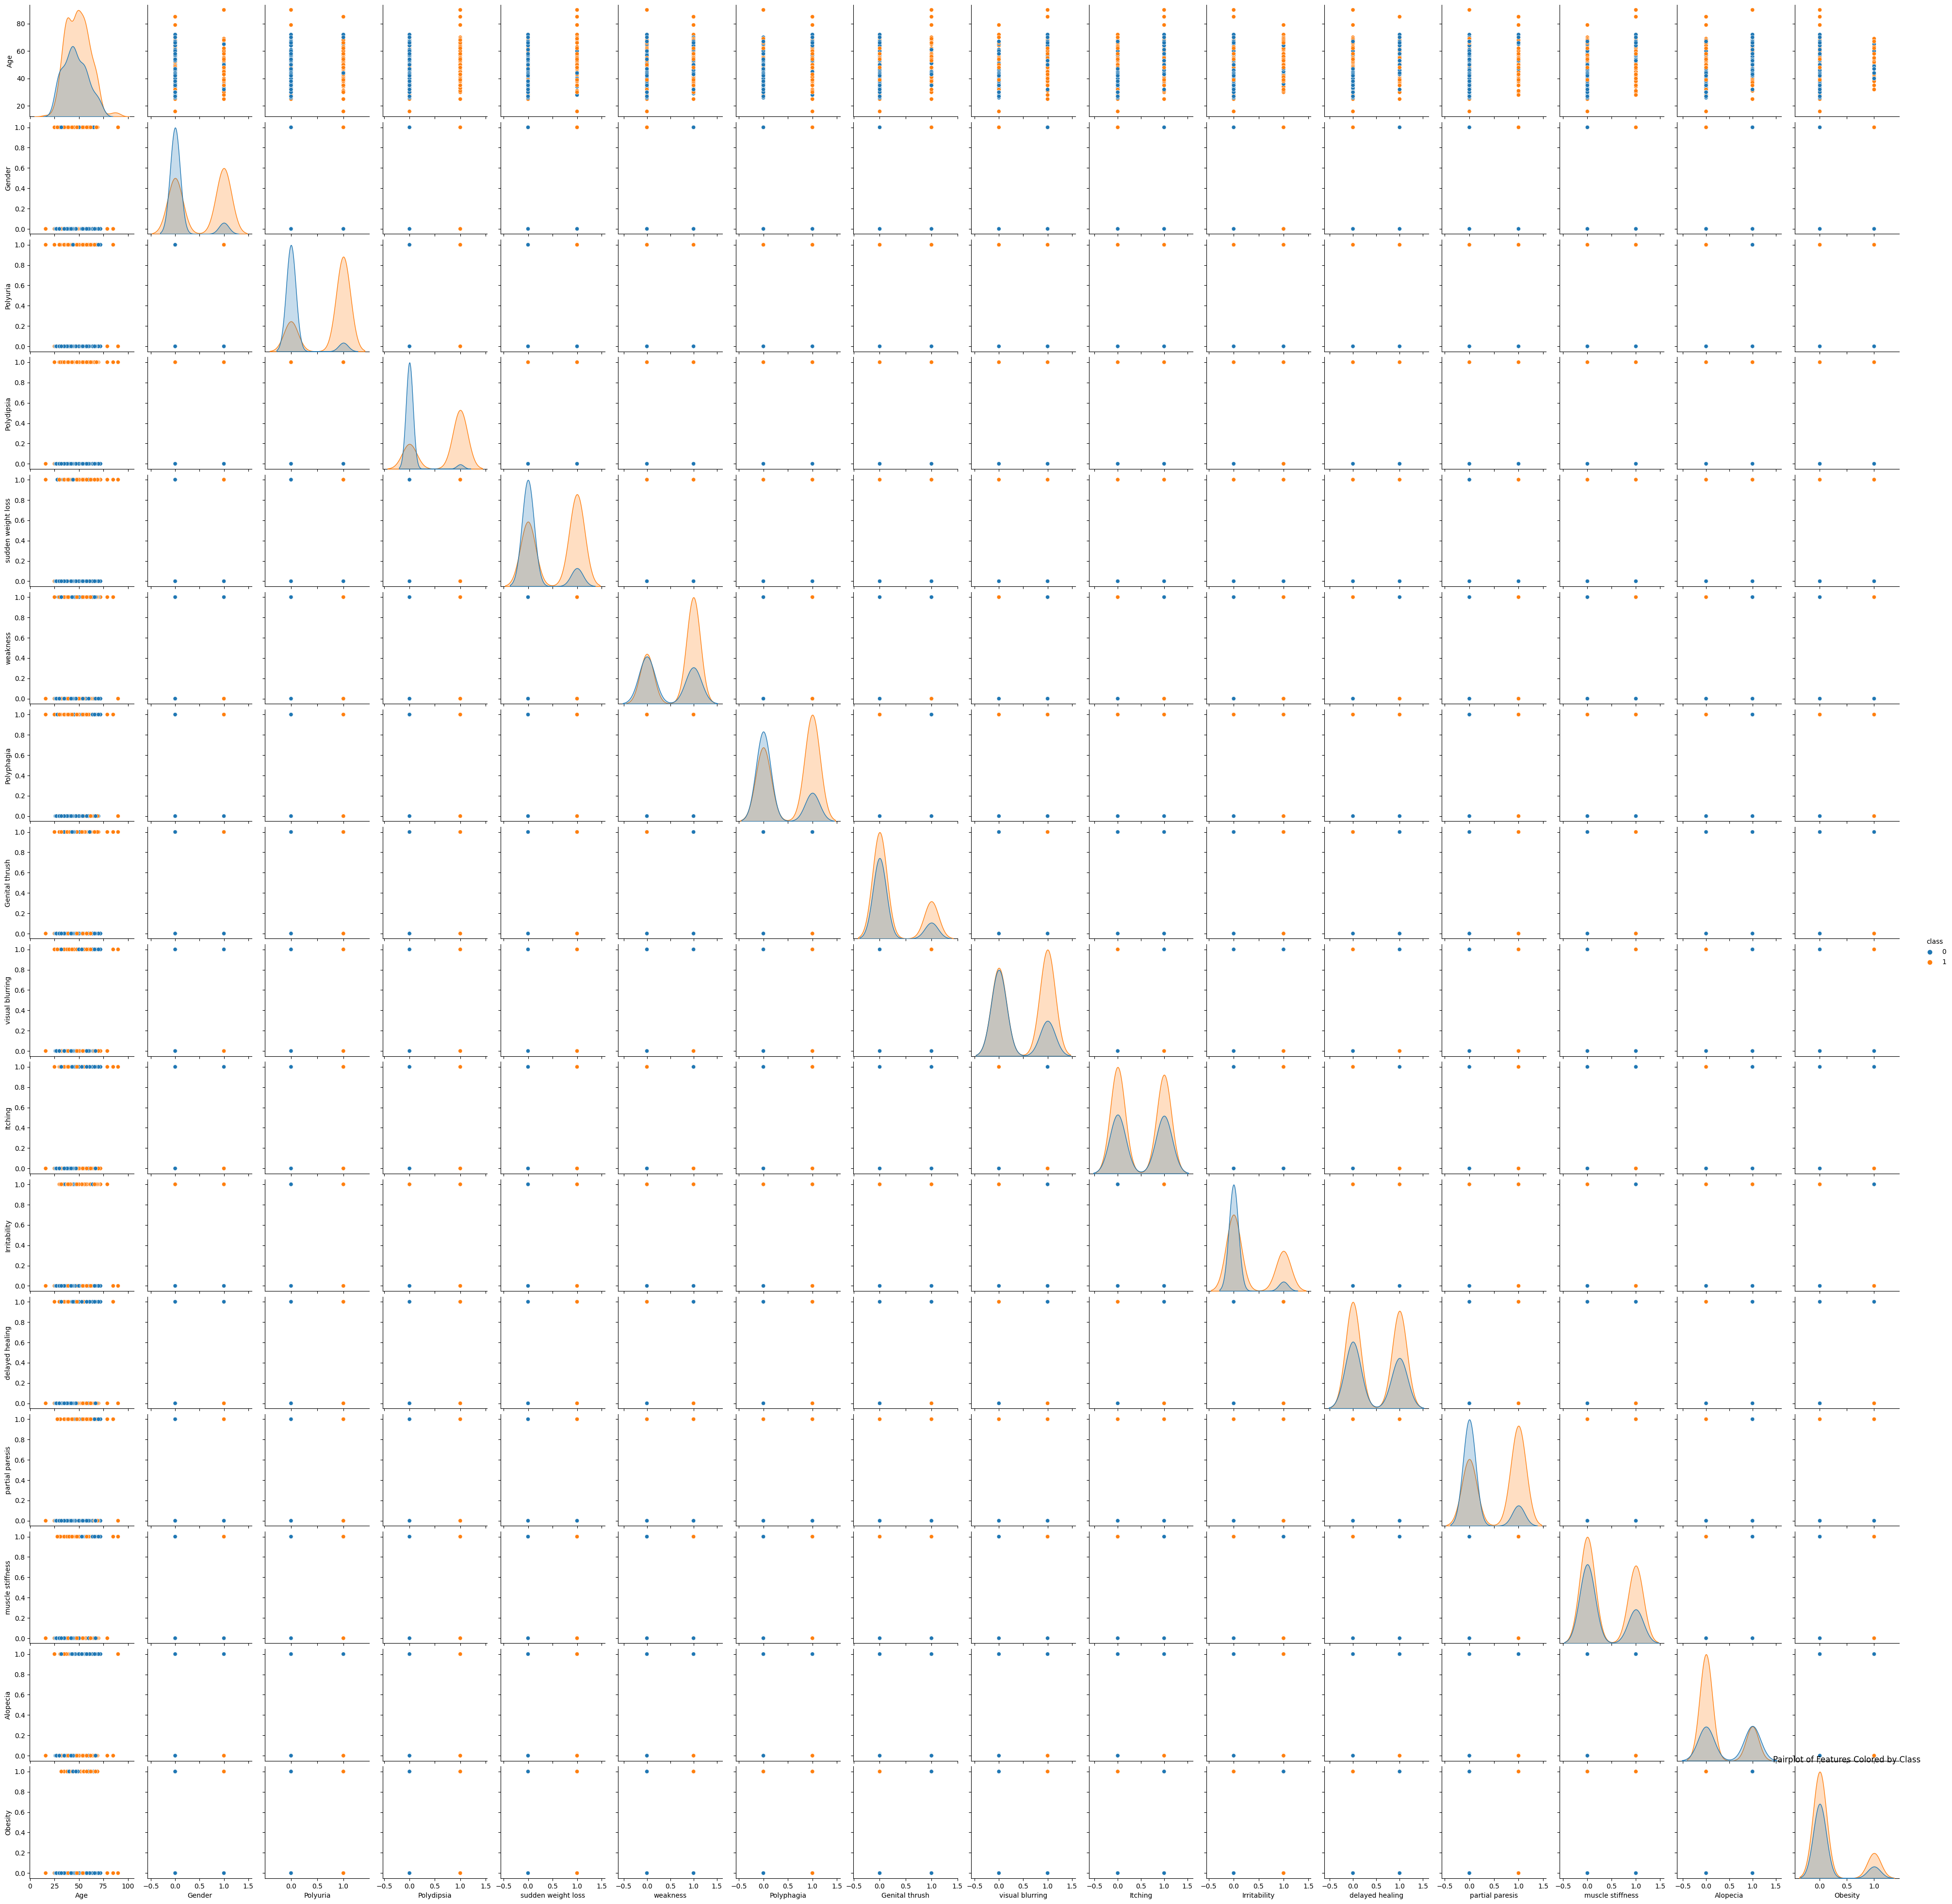

In [15]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='class', diag_kind='kde')
plt.title('Pairplot of Features Colored by Class')
plt.show()

In [16]:
# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Model training using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Model evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[33  0]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [22]:
# Optional: Visualize the feature importances
feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

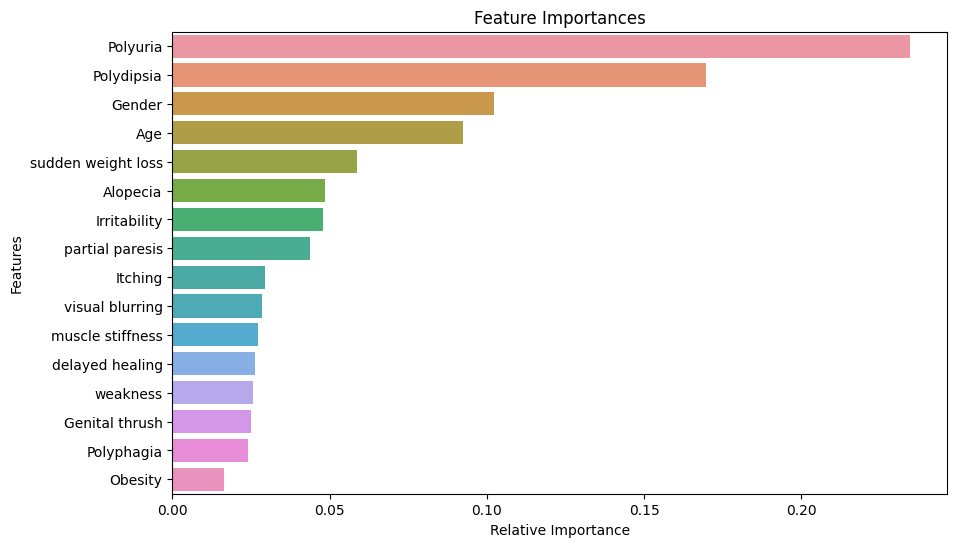

In [23]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()